## Load and getting familiar with NetCDF datasets

In [1]:
# import Xarray
import xarray as xr

In [2]:
# load dataset
ds = xr.open_dataset('data.nc') # file refers to temperature and precipitation data around the Amazon rainforest

In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Select and filter data through coordinates

In [4]:
ds.sel(longitude=-82)

<xarray.Dataset>
Dimensions:    (latitude: 89, expver: 2, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude) float32 ...
    skt        (time, expver, latitude) float32 ...
    tp         (time, expver, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
ds.sel(longitude=-82, 
       latitude=5.75,
       time='2018-01-01')

<xarray.Dataset>
Dimensions:    (expver: 2)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 5.75
  * expver     (expver) int32 1 5
    time       datetime64[ns] 2018-01-01
Data variables:
    lai_hv     (expver) float32 ...
    skt        (expver) float32 ...
    tp         (expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
# ds.sel(longitude=99)

In [8]:
ds.sel(longitude=-99,
       method='nearest')

C:\Users\mark2\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.Dataset>
Dimensions:    (latitude: 89, expver: 2, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude) float32 ...
    skt        (time, expver, latitude) float32 ...
    tp         (time, expver, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [9]:
ds.sel(latitude=[-16, -15],
       longitude=[-46, -47],
       method="nearest")

<xarray.Dataset>
Dimensions:    (longitude: 2, latitude: 2, expver: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -46.75 -47.0
  * latitude   (latitude) float32 -16.0 -15.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [10]:
ds.isel(latitude=0, 
        longitude=0)

<xarray.Dataset>
Dimensions:    (expver: 2, time: 500)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 6.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver) float32 ...
    skt        (time, expver) float32 ...
    tp         (time, expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [11]:
QUERY = ds.longitude < -64
QUERY = QUERY & (ds.latitude > -8)

ds.where(QUERY,
         drop=True)  #filter all the data that is west to minus 64, and north to minus eight.

<xarray.Dataset>
Dimensions:    (time: 500, expver: 2, latitude: 56, longitude: 72)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -64.75 -64.5 -64.25
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -7.0 -7.25 -7.5 -7.75
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 0.0 0.0 ... 6.63
    skt        (time, expver, latitude, longitude) float32 300.7 300.6 ... 300.5
    tp         (time, expver, latitude, longitude) float32 0.0004338 ... 0.00...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Visualize multidimensional and geospatial variables

In [12]:
import xarray as xr

In [13]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [14]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.84399414, 271.17169189, 275.49935913, 279.82705688,
        284.15472412, 288.48242188, 292.81011963, 297.13778687,
        301.46548462, 305.79315186, 310.12084961]),
 <BarContainer object of 10 artists>)

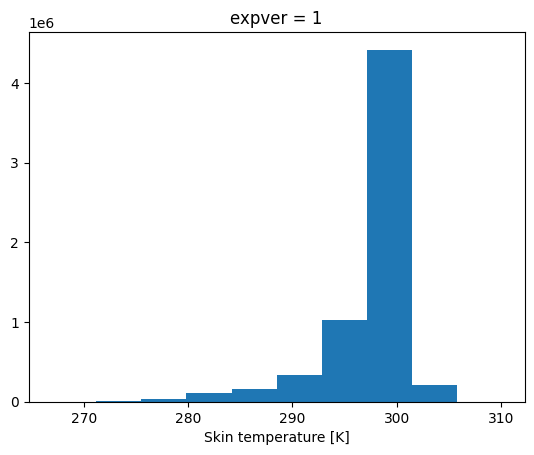

In [15]:
ds.skt.plot()

- Histogram is plotted for all the skin temperatures over the dataset
- Xarray automatically adds the label
- Xarray also selects the visualization according to the dimensionality of the dataset. 
- When the data have more than two dimensions, the default is to plot a histogram

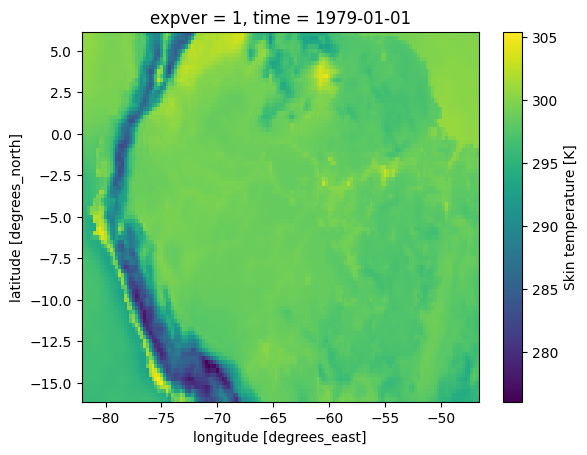

In [16]:
# To visualize only the temperatures on the first time data point

ds.isel(time=0).skt.plot()


- Xarray detected that there are two coordinates for the skin temperature
- It has plotted a matrix visualization
- this represents the map for the temperatures over the Amazon.

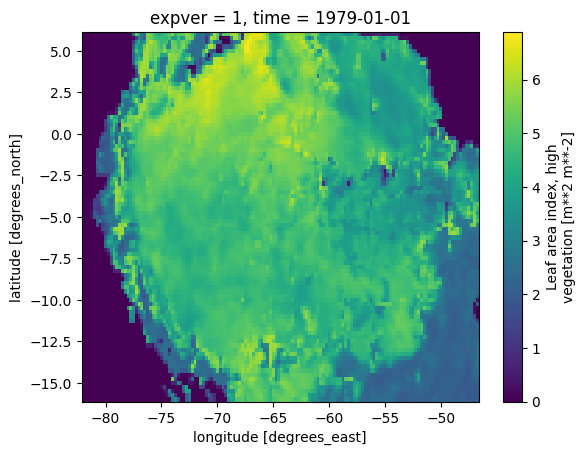

In [17]:
# vegetation index for the Amazon
ds.isel(time=0).lai_hv.plot()

- This map shows the vegetation density. Bright colors represents conserved forests, while dark spots are places where there are no forests, like oceans, savannahs and pastures.

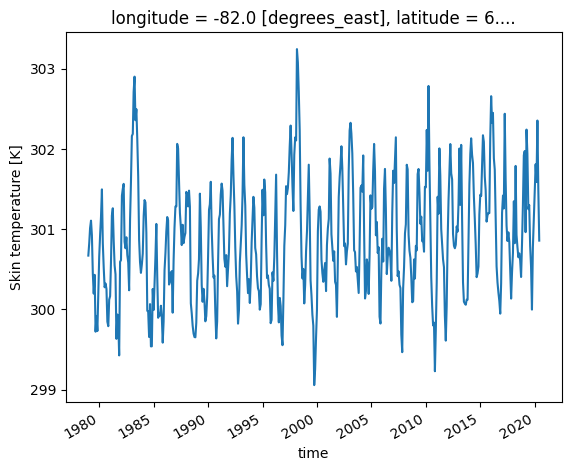

In [18]:
# one-dimensional plot

ds.isel(longitude=0, latitude=0).skt.plot()

- This shows the temperature time series since 1980 for a point over the Amazon


C:\Users\mark2\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


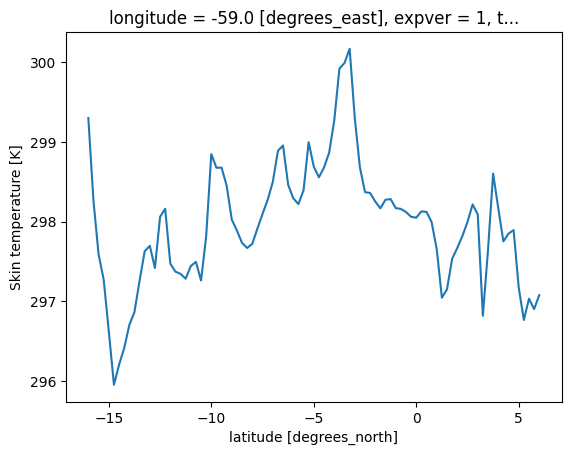

In [20]:
ds.isel(time=0).sel(longitude=-59, method='nearest').skt.plot()

- It shows how temperature changes according to the latitude.
- There is a high point near latitude minus 5, and that it has a very diffuse trend before going up again.

## Apply simple operations over multidimensional data

In [21]:
import xarray as xr

In [22]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [23]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [24]:
# temperature change between present and fourty years ago.

In [25]:
temp_change = (ds.skt.sel(time='2019-01-01') 
               - ds.skt.sel(time='1979-01-01'))

temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

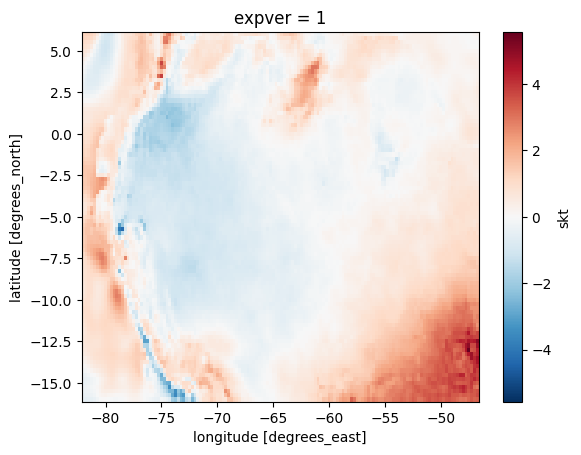

In [26]:
temp_change.plot()

- The temperature has increased in most parts, however there are some spots where the temperature actually got colder! That's the variable and localized part of climate change: a lot of places is going to be way hotter, and other places is actually to get a bit colder, and on average there are more hot places than cold places

In [27]:
# vegetation change across seasons. 

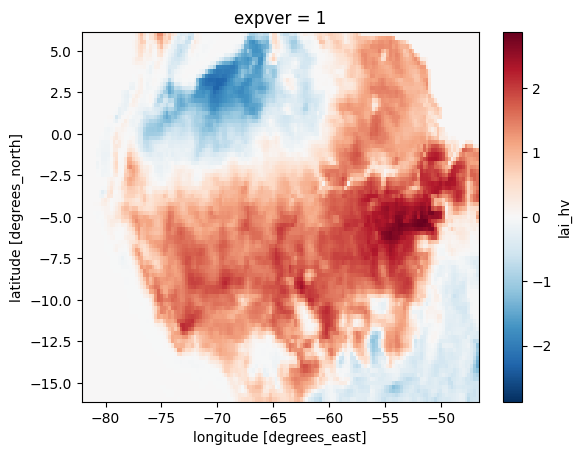

In [28]:
seasonal_change = (ds.lai_hv.sel(time='2019-07-01')
                  - ds.lai_hv.sel(time='2019-01-01'))
seasonal_change.plot()

- Red places have more vegetation density at July, and blue places have more density on January.


### Aggregations 

In [29]:
# mean
ds.skt.mean()

<xarray.DataArray 'skt' ()>
array(297.2683, dtype=float32)
Coordinates:
    expver   int32 1

- The mean of the temperature across all latitudes, longitudes and times is 297 Kelvin

In [30]:
mean_temp = ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

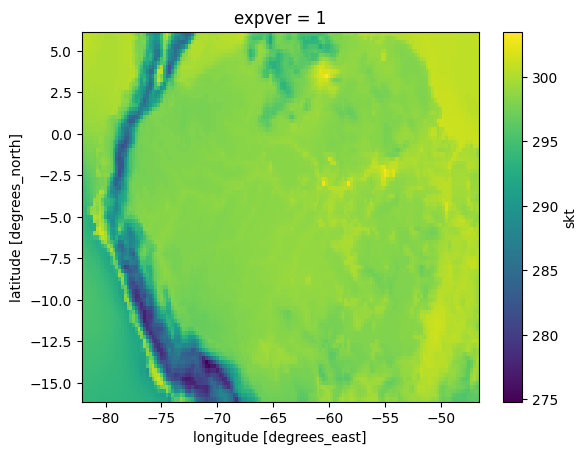

In [31]:
mean_temp.plot()

-  map for the mean temperature at each point on time.

In [ ]:
# temperature changes across differing latitudes

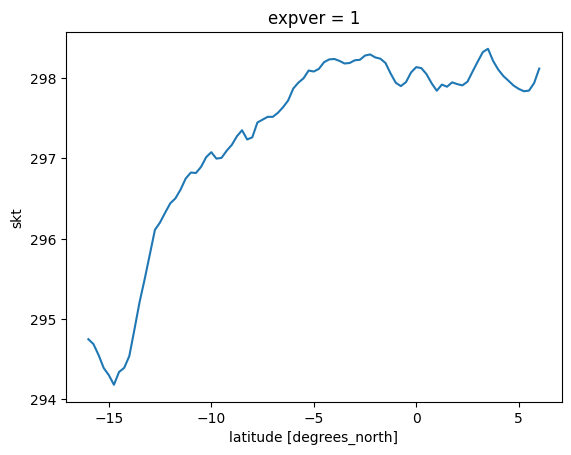

In [32]:
(ds.skt.mean(dim=['time', 'longitude'])).plot()

- The temperature is high near Latitude zero, which is the equator line, and then decreases when you go South.

In [33]:
# standard deviation

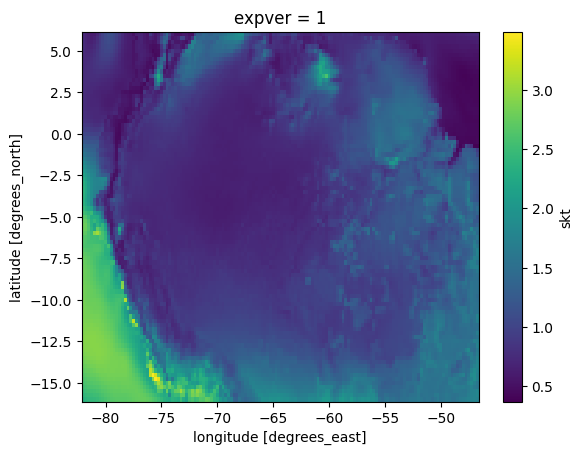

In [34]:
ds.skt.std(dim='time').plot()

- This shows how much the temperature varies , bright places have a lot of temperature variations

In [35]:
# median temperature across time

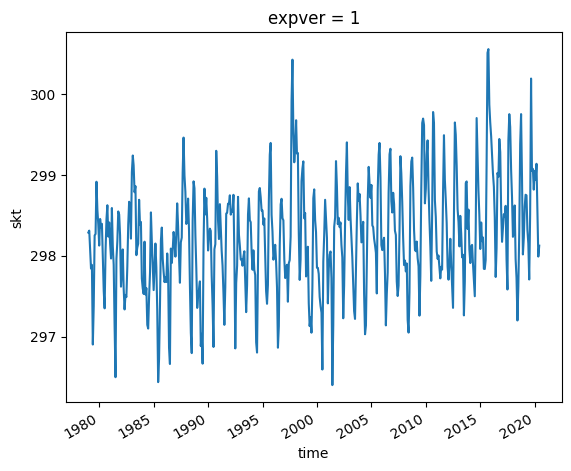

In [36]:
ds.skt.median(dim=['latitude', 'longitude']).plot()

## Apply grouped operations over multidimensional data

In [37]:
import xarray as xr

In [38]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [39]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

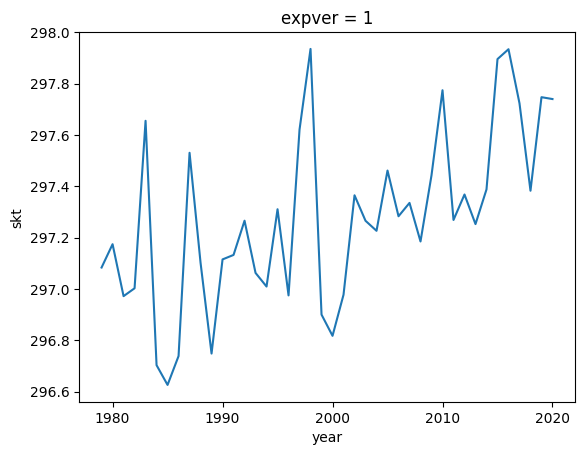

In [40]:
# to get the annual temperature
(ds.groupby(ds.time.dt.year)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt
   .plot())

- temperature has increased between 0.6 and 0.8 degrees Celsius since the data started recording, and most of the trend is carrying since the 2000s.

In [41]:
(ds.groupby(ds.time.dt.year)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt)

<xarray.DataArray 'skt' (year: 42)>
array([297.08368, 297.17456, 296.9722 , 297.0028 , 297.65518, 296.70334,
       296.6264 , 296.73883, 297.5306 , 297.1022 , 296.74857, 297.11533,
       297.13272, 297.26608, 297.06268, 297.0096 , 297.3107 , 296.9751 ,
       297.6209 , 297.93518, 296.90033, 296.81763, 296.97772, 297.36505,
       297.26578, 297.2267 , 297.46146, 297.2834 , 297.33542, 297.18515,
       297.44296, 297.77426, 297.26892, 297.36813, 297.25284, 297.38797,
       297.89557, 297.93402, 297.72333, 297.3828 , 297.74722, 297.73993],
      dtype=float32)
Coordinates:
    expver   int32 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020

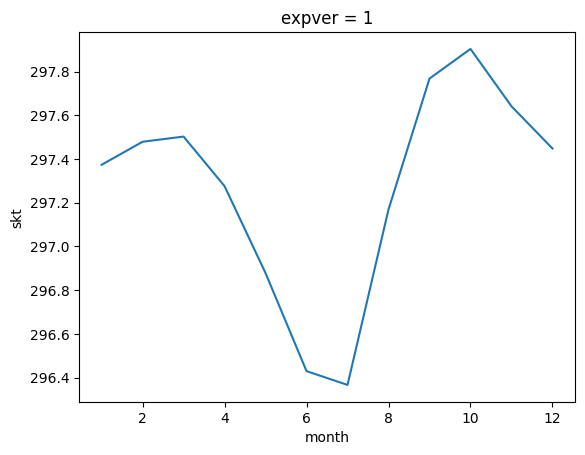

In [43]:
(ds.groupby(ds.time.dt.month) # seasonal mean temperature
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt
   .plot())

- Months 6 and 7 are the coldest, and month 10 is the hottested, with a 1.4 degree celsius difference between them.

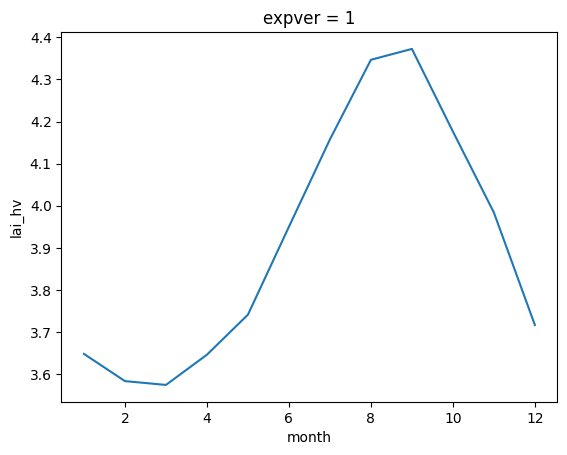

In [45]:
(ds.groupby(ds.time.dt.month)
   .mean(dim=['time', 'latitude', 'longitude'])
   .lai_hv
   .plot())

- Vegetation is at the most dense state on months 8 and 9, and less dense on month 3.


In [ ]:
# Resampling

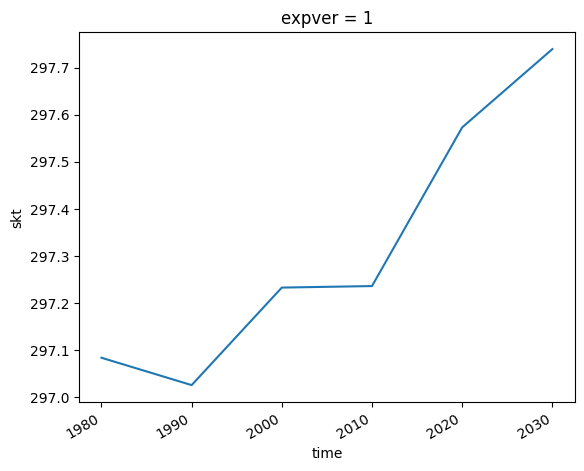

In [46]:
(ds.resample({'time': '10y'})
    .mean(dim=['time', 'latitude', 'longitude'])
    .skt
    .plot()
)

- It shows the temperature is increasing in Amazon, and that it went up from 297.1K to about 297.7K 

## Merge and concatenate datasets

In [47]:
import xarray as xr

In [48]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [49]:
da = ds.time.dt.year # year of the points
da

<xarray.DataArray 'year' (time: 500)>
array([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       1979, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
       1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988,
       1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989,
       1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997,
...
       2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020], dtype=int64)
Coordinates:
    expver   int32 1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

- year variable has only the time dimension

In [50]:
# Merge

ds_1 = ds.merge(da)
ds_1


<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    year       (time) int64 1979 1979 1979 1979 1979 ... 2020 2020 2020 2020
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [51]:
# sum of the squares of the latitude and the longitude

In [52]:
da = ds.longitude ** 2 + ds.latitude ** 2
da.name = 'squared_distance'
ds_2 = ds.merge(da)
ds_2

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 ...
    skt               (time, latitude, longitude) float32 ...
    tp                (time, latitude, longitude) float32 ...
    squared_distance  (longitude, latitude) float32 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [53]:
ds_3 = ds_1.merge(ds_2)
ds_3

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 0.0 0.0 ... nan nan
    skt               (time, latitude, longitude) float32 300.7 300.6 ... nan
    tp                (time, latitude, longitude) float32 0.0004338 ... nan
    year              (time) int64 1979 1979 1979 1979 ... 2020 2020 2020 2020
    squared_distance  (longitude, latitude) float32 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [54]:
# concatenation

In [55]:
ds_square_root = ds_3 ** (1 / 2)
ds_cube_root = ds_3 ** (1 / 3)
ds_4 = xr.concat([ds_3, ds_square_root, ds_cube_root], 'new_dim')
ds_4

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500, new_dim: 3)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Dimensions without coordinates: new_dim
Data variables:
    lai_hv            (new_dim, time, latitude, longitude) float32 0.0 ... nan
    skt               (new_dim, time, latitude, longitude) float32 300.7 ... nan
    tp                (new_dim, time, latitude, longitude) float32 0.0004338 ...
    year              (new_dim, time) float64 1.979e+03 1.979e+03 ... 12.64
    squared_distance  (new_dim, longitude, latitude) float32 6.76e+03 ... 13.47
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

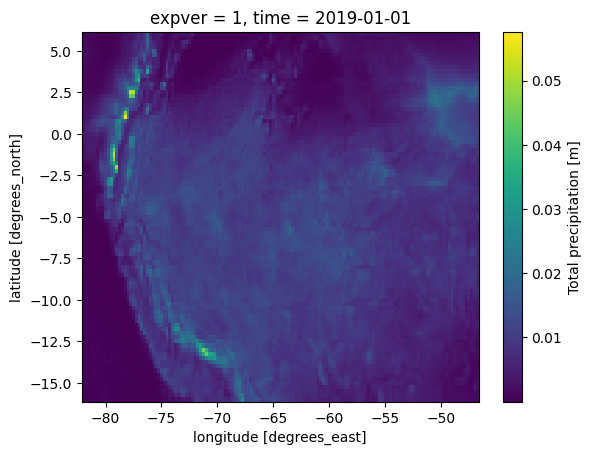

In [56]:
ds.sel(time='2019-01-01').tp.plot()

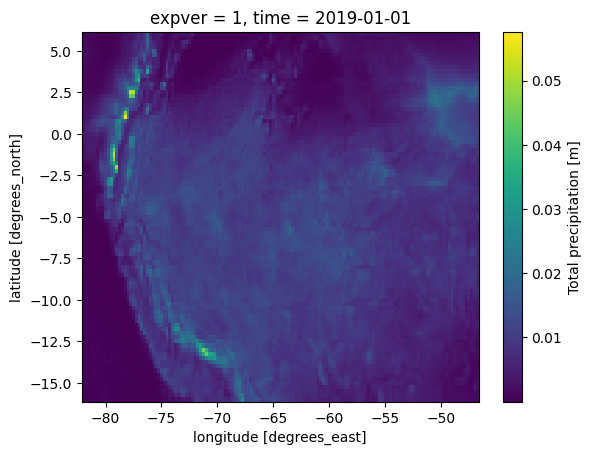

In [57]:
ds_4.sel(new_dim=0, time='2019-01-01').tp.plot()

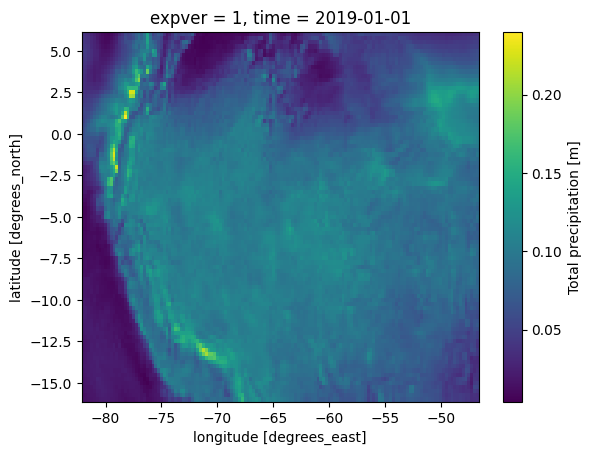

In [58]:
ds_4.sel(new_dim=1, time='2019-01-01').tp.plot()

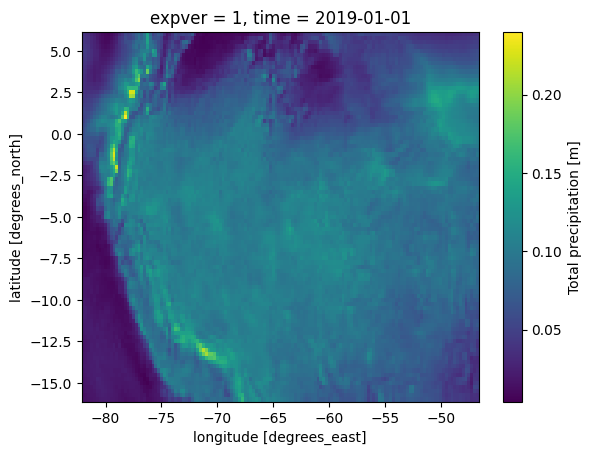

In [59]:
ds_4.sel(new_dim=1, time='2019-01-01').tp.plot()

## Interact with Pandas and export datasets

In [60]:
import xarray as xr

In [61]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [62]:
df = ds.to_dataframe()
df


expver    lai_hv         skt        tp
longitude latitude time                                              
-82.00     6.0     1979-01-01       1  0.000000  300.670105  0.000434
                   1979-02-01       1  0.000000  300.829926  0.001139
                   1979-03-01       1  0.000000  301.014832  0.005566
                   1979-04-01       1  0.000000  301.105957  0.011398
                   1979-05-01       1  0.000000  300.924347  0.009486
...                               ...       ...         ...       ...
-46.75    -16.0    2020-04-01       1  1.905231  295.797791  0.004340
                   2020-05-01       1  1.735271  293.425049  0.001070
                   2020-06-01       1  1.578286  293.098816  0.000035
                   2020-07-01       1       NaN         NaN       NaN
                   2020-08-01       1       NaN         NaN       NaN

[6319000 rows x 4 columns]

In [63]:
da = ds.time.dt.month
da.to_dataframe()

,expver,month
time,,
1979-01-01,1,1
1979-02-01,1,2
1979-03-01,1,3
1979-04-01,1,4
1979-05-01,1,5
...,...,...
2020-04-01,1,4
2020-05-01,1,5
2020-06-01,1,6


In [64]:
da.to_series()

time
1979-01-01    1
1979-02-01    2
1979-03-01    3
1979-04-01    4
1979-05-01    5
             ..
2020-04-01    4
2020-05-01    5
2020-06-01    6
2020-07-01    7
2020-08-01    8
Name: month, Length: 500, dtype: int64

In [65]:
xr.Dataset.from_dataframe(df)

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    expver     (longitude, latitude, time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    lai_hv     (longitude, latitude, time) float32 0.0 0.0 0.0 ... 1.578 nan nan
    skt        (longitude, latitude, time) float32 300.7 300.8 301.0 ... nan nan
    tp         (longitude, latitude, time) float32 0.0004338 0.001139 ... nan

In [66]:
xr.DataArray.from_series(df.skt)

<xarray.DataArray 'skt' (longitude: 142, latitude: 89, time: 500)>
array([[[300.6701 , 300.82993, 301.01483, ..., 300.857  ,       nan,
               nan],
        [300.647  , 300.77512, 300.85104, ..., 300.8352 ,       nan,
               nan],
        [300.6351 , 300.7619 , 300.71237, ..., 300.8121 ,       nan,
               nan],
        ...,
        [295.848  , 296.73026, 297.36688, ..., 293.81006,       nan,
               nan],
        [295.81894, 296.68536, 297.25528, ..., 293.8061 ,       nan,
               nan],
        [295.77206, 296.6583 , 297.15753, ..., 293.6714 ,       nan,
               nan]],

       [[300.60406, 300.71503, 300.84116, ..., 300.79227,       nan,
               nan],
        [300.58426, 300.63312, 300.65756, ..., 300.80417,       nan,
               nan],
        [300.56906, 300.57236, 300.47595, ..., 300.7784 ,       nan,
               nan],
...
        [295.55347, 296.13065, 296.93893, ..., 293.72025,       nan,
               nan],
        [295.31308, 295.9061 , 296.6028 , ..., 293.30817,       nan,
               nan],
        [295.3362 , 296.01376, 296.56384, ..., 293.1675 ,       nan,
               nan]],

       [[299.58643, 299.99585, 300.03284, ..., 301.48172,       nan,
               nan],
        [299.75018, 300.15436, 300.1418 , ..., 301.52466,       nan,
               nan],
        [299.8968 , 300.27322, 300.2303 , ..., 301.59332,       nan,
               nan],
        ...,
        [295.77997, 296.26733, 297.01688, ..., 293.55383,       nan,
               nan],
        [295.47687, 295.99988, 296.6596 , ..., 293.22165,       nan,
               nan],
        [295.1995 , 295.83215, 296.38223, ..., 293.09882,       nan,
               nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [67]:
# export the dataset

In [68]:
ds.to_netcdf('export.nc')

In [69]:
xr.open_dataset('export.nc')

<xarray.Dataset>
Dimensions:    (time: 500, latitude: 89, longitude: 142)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 ...
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...